Hello!
This is a beginner tutorial for using torch and creating your first NN.

Understanding these things can be tricky - if you are the type of person (like me), who needs to fully understand the architecture of a NN before feeling comfortable coding. check out https://www.youtube.com/watch?v=IHZwWFHWa-w&t=4s, https://www.youtube.com/watch?v=Ilg3gGewQ5U, and https://www.youtube.com/watch?v=tIeHLnjs5U8

3Blue1Brown is a gifted teacher and his graphics help to clarify confusing concepts.  

For a link to the step by step, check out https://www.youtube.com/watch?v=V_xro1bcAuA&list=LL&index=7&t=18530s

In [93]:
#Import Libraries
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'2.4.0+cpu'

In [94]:
#We are going to create a simple dataset that follows a perfectly linear trend
#The end goal is to see if we are able to build a NN which learns to model this linear regression

weight = 0.5
bias = 0.5

start = 0
end = 1
step = 0.02

#Standard practice - Capital is a matrix or tensor, lower case is a vector
#Creating data 
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

In [95]:
#Critical Step is always splitting our dataset
#Since our data is linear, we can split the data set as follows: 
#first 80% is our training data, last 20% is our test data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],  y[train_split: ]

In [53]:
#Defining a plot function to help us visualize results 
def plot_pred(train_data = X_train, train_labels = y_train, test_data=X_test, test_labels = y_test, predictions = None):    
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data,train_labels, c= 'b', s = 4, label = "Training Data")
    plt.scatter(test_data,test_labels, c= 'r', s = 4, label = "Test Data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', s = 4, label = "Predictions")
        
    plt.legend(prop = {"size": 14})
    

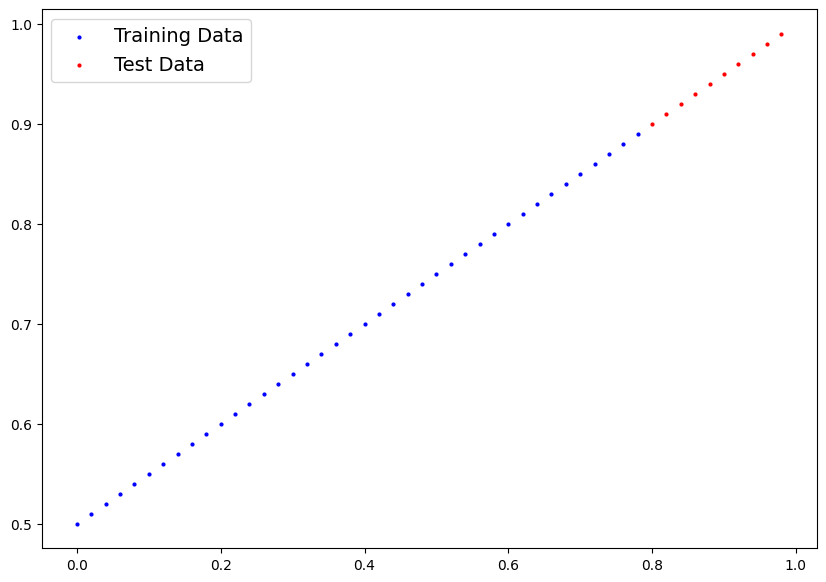

In [97]:
plot_pred()

In [98]:
#Now that we have our data and have made a good split, we can now work to train our model

#We are inheriting from nn.Module - common in pyTorch
#nn.Module is the base class for ALL neural network modules

#https://pytorch.org/docs/stable/generated/torch.nn.Module.html

#Super simple - we are just using one node essentially with a weight and bias

#Check out the pytorch cheat sheet below
#https://pytorch.org/tutorials/beginner/ptcheat.html
class LinearRegressionModel(nn.Module):
    #Defining our construcotr
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
        
    #Where x is our training data
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias

In [99]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

#Check out the parameters 
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [100]:
# List of parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [101]:
weight, bias

(0.5, 0.5)

In [102]:
X_test, y_test 

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.9000],
         [0.9100],
         [0.9200],
         [0.9300],
         [0.9400],
         [0.9500],
         [0.9600],
         [0.9700],
         [0.9800],
         [0.9900]]))

In [103]:
#with inference mode - turns off gradient tracking - let's us plot more easily
#Can make our predictions much faster as we don't 
with torch.no_grad():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

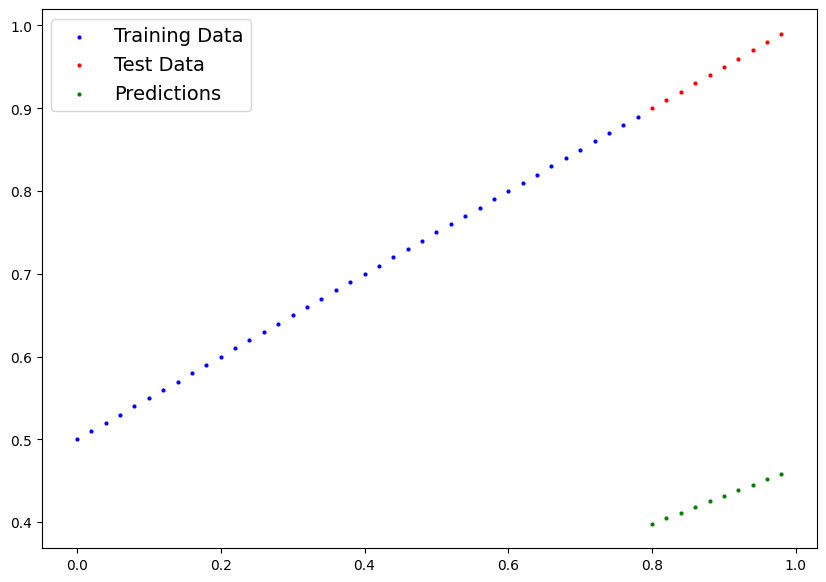

In [104]:
plot_pred(predictions = y_preds)

In [108]:
#PyTorch has tons of loss functions we can use - experiment with this!
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.0001)

epochs = 10000
for epoch in range(epochs):
    model_0.train() # train mode in pytorch sets all params that need a gradient to have a gradient
    
    #1 Forward pass
    y_pred = model_0(X_train)
    
    #2 Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    #3 optimizer zero grad
    optimizer.zero_grad()
    
    #4 Perform Backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    #5 Step our optmizer
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 1000  == 0:  
        print(f"Epoch: {epoch} | Train_Loss: {loss} | Test Loss: {test_loss}")
        print(model_0.state_dict())

Epoch: 0 | Train_Loss: 0.4233597218990326 | Test Loss: 0.5029293298721313
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1389]))])
Epoch: 1000 | Train_Loss: 0.308143675327301 | Test Loss: 0.3682076036930084
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2389]))])
Epoch: 2000 | Train_Loss: 0.1929408460855484 | Test Loss: 0.23349913954734802
OrderedDict([('weights', tensor([0.4187])), ('bias', tensor([0.3389]))])
Epoch: 3000 | Train_Loss: 0.0777396708726883 | Test Loss: 0.09879235923290253
OrderedDict([('weights', tensor([0.4577])), ('bias', tensor([0.4389]))])
Epoch: 4000 | Train_Loss: 0.001962269889190793 | Test Loss: 0.00458100438117981
OrderedDict([('weights', tensor([0.4903])), ('bias', tensor([0.5041]))])
Epoch: 5000 | Train_Loss: 3.95394854422193e-05 | Test Loss: 6.452202796936035e-05
OrderedDict([('weights', tensor([0.5000])), ('bias', tensor([0.5001]))])
Epoch: 6000 | Train_Loss: 3.95394854422193e-05 | Test Loss: 6.452202796936035e-05
OrderedDict(

In [109]:
y_preds_new = model_0(X_test)

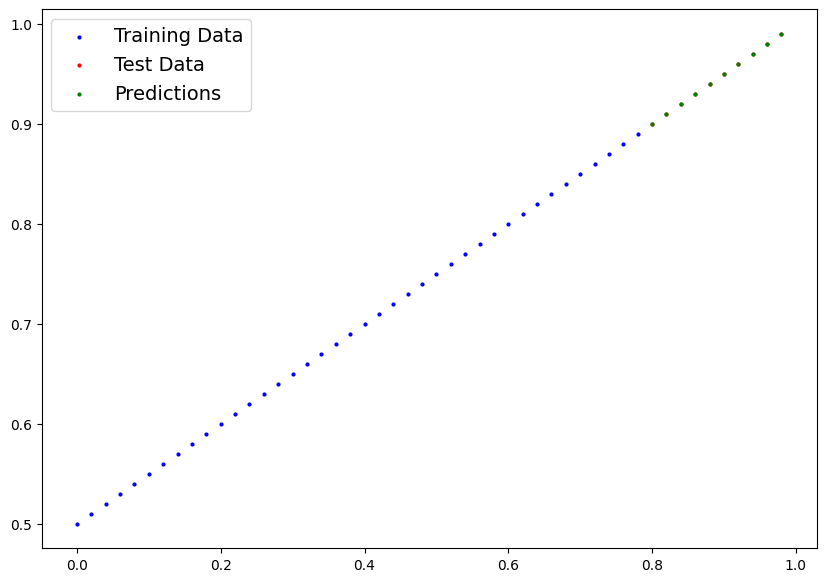

In [110]:
#So our model has successfully predicted our linear regression!
with torch.inference_mode():
    plot_pred(predictions = y_preds_new)

In [112]:
#Now we can save our model

from pathlib import Path
MODEL_PATH = Path("models")
#exist ok won't draw an error if it already exists
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "01_pyTorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj = model_0.state_dict(),f=MODEL_SAVE_PATH)

In [114]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Sep 23 21:39 01_pyTorch_workflow_model_0.pth


In [1]:
import torch
from torch import nn 
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'2.4.0'

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device {device}")

Using device cuda


In [6]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)

y = weight * X + bias

In [10]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(len(X_train), len(y_train), len(X_test), len(y_test))

40 40 10 10


In [22]:
class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        #Creates the parameters weights and biases for us
        self.linear_layer = nn.Linear(in_features = 1, out_features = 1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
model_1 = LinearRegressionV2()
model_1, model_1.state_dict()

(LinearRegressionV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [31]:
next(model_1.parameters()).device

device(type='cpu')

In [33]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [34]:
#Now let us do our training loop again
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)
loss_fn = nn.L1Loss()

X_train= X_train.to(device)
X_test= X_test.to(device)
y_train= y_train.to(device)
y_test= y_test.to(device)

epochs = 200
for epoch in range(epochs):
    model_1.train()
    y_preds = model_1(X_train)
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 100 == 0:
        print(f"Train Loss: {loss} | Test Loss: {test_loss}")
    

Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882


In [35]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [52]:
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')